In [2]:
#таблица признаков
#каждая строка - выборка (sample) (относится к одному из измеренных цветком), n_samples = кол-во строк
#каждый столбик же это признак(feature) цветов, n_features - кол-во столбцов

import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


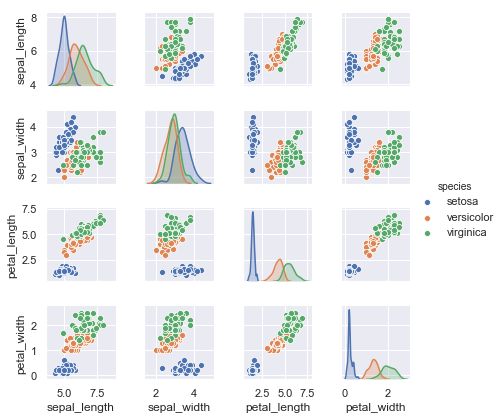

In [3]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height =1.5)

In [4]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

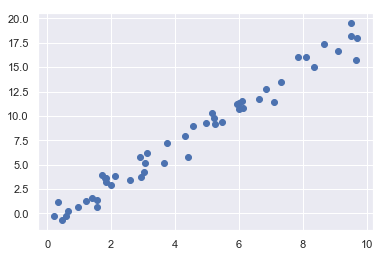

In [6]:
#простая линейная регрессия(обучение с учителем)
#
#
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10* rng.rand(50)
y = 2*x -1 + rng.randn(50)
plt.scatter(x, y)


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [10]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
model.coef_

array([1.9776566])

In [12]:
model.intercept_

-0.9033107255311164

In [13]:
xfit = np.linspace(-1, 11)

In [14]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

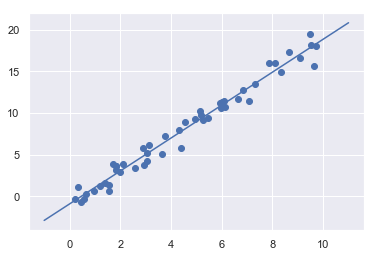

In [15]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [16]:
#классификация набора данных(Iris, обучение С учителем)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [17]:
from  sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [18]:
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [20]:
#понижение размерности набора данных Iris (обучение БЕЗ учителя)
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

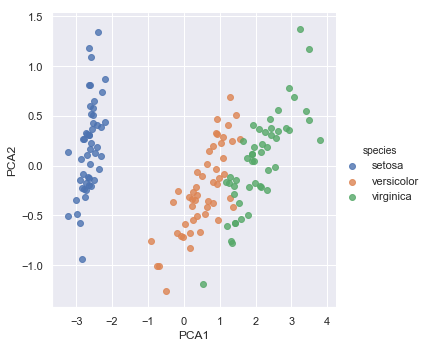

In [21]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

In [36]:
#кластеризация набора данных(обучение БЕЗ учителя)
#гаусов наивный баесовский классификатор
#данная модель не имеет пареметров и имеет хорошую производительность
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

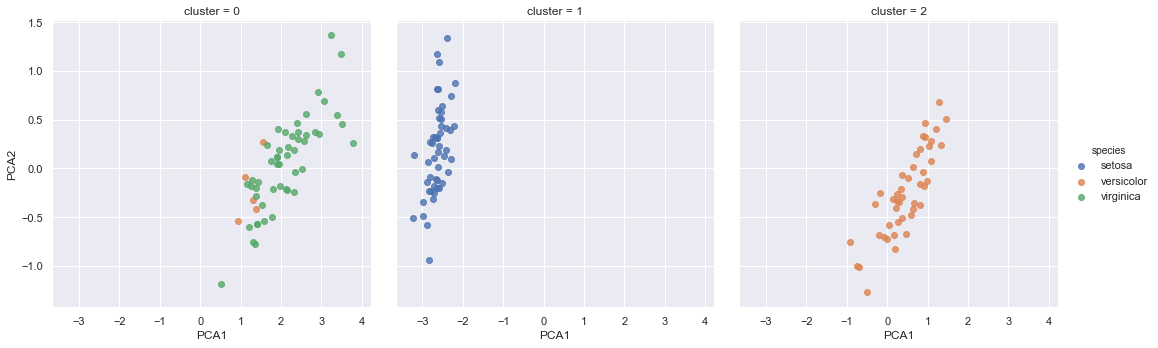

In [23]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False)


In [24]:
#анализ рукописных цифр
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

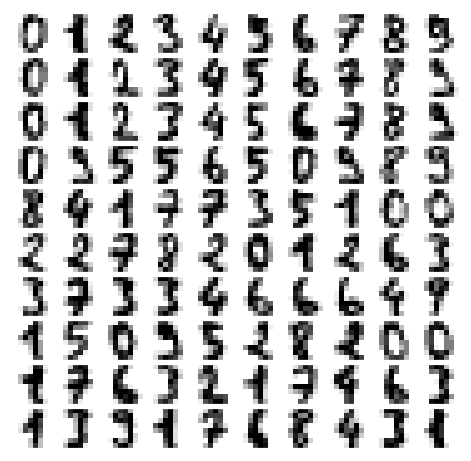

In [25]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize = (8, 8), 
                         subplot_kw={'xticks':[],'yticks':[]}, 
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')

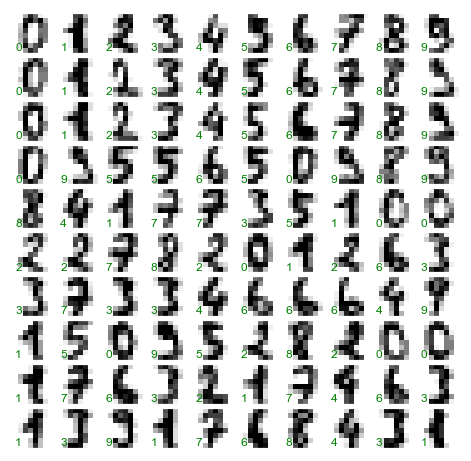

In [26]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize = (8, 8), 
                         subplot_kw={'xticks':[],'yticks':[]}, 
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [27]:
X = digits.data 
X.shape

(1797, 64)

In [28]:
y = digits.target
y.shape
#итого 1797 выборок и 64 признака

(1797,)

In [29]:
#понижение размерности(без учителя)
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
iso.fit(digits.data)
data_project = iso.transform(digits.data)
data_project.shape

(1797, 2)

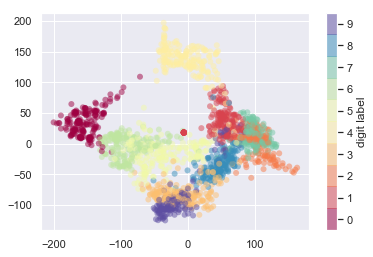

In [30]:
plt.scatter(data_project[:, 0], data_project[:, 1], c=digits.target, edgecolor = 'none', alpha=0.5, 
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

In [31]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0)

In [32]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [33]:
from  sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(89.18, 0.5, 'true value')

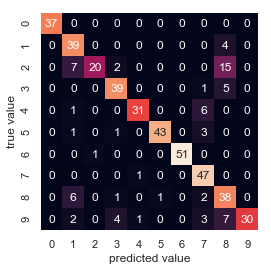

In [34]:
#матрица различия 
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value') #прогнозируемое значение
plt.ylabel('true value') #настоящее значение

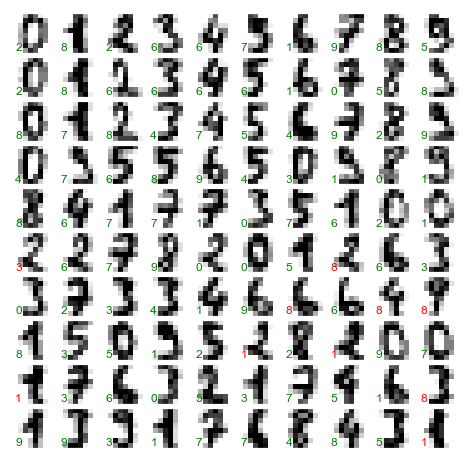

In [35]:
fig, axes = plt.subplots(10, 10, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]), transform=ax.transAxes, color='green' if (ytest[i] == y_model[i]) else 'red')